In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv("Data/creditcard_2023.csv")

In [2]:
# Basic information of the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

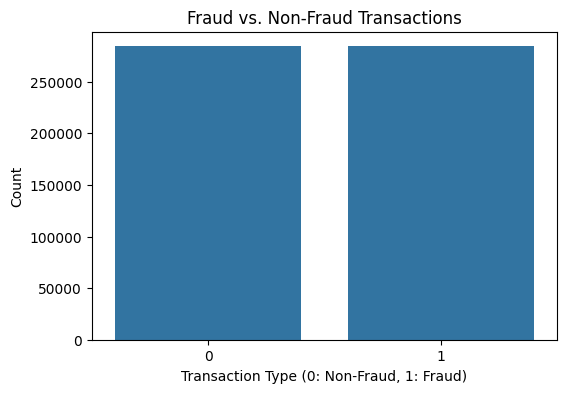

In [3]:
# Statistics on the number of fraudulent and non-fraudulent transactions
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xlabel("Transaction Type (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

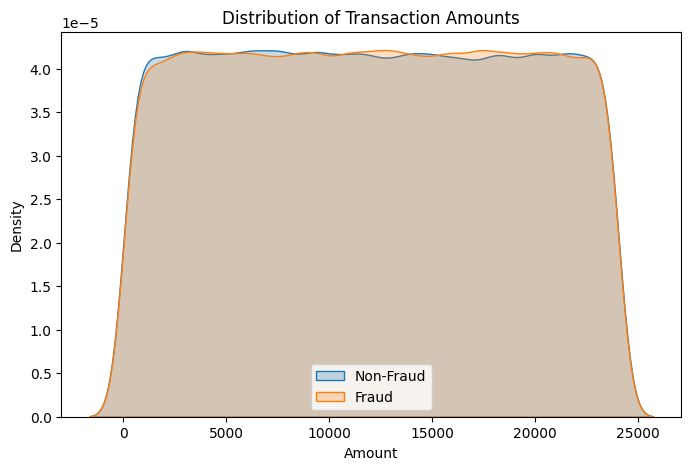

                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.00000

In [4]:
# KDE distribution of transaction amount
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["Class"] == 0]["Amount"], label="Non-Fraud", fill=True)  # 替换 shade=True 为 fill=True
sns.kdeplot(df[df["Class"] == 1]["Amount"], label="Fraud", fill=True)
plt.title("Distribution of Transaction Amounts")
plt.legend()
plt.show()
print(df.describe())

In [5]:
from scipy import stats
import numpy as np

# Extract the amount of fraudulent and non-fraudulent transactions
fraud_amounts = df[df["Class"] == 1]["Amount"]
non_fraud_amounts = df[df["Class"] == 0]["Amount"]

# t-test comparing fraudulent and normal transaction amounts
t_stat, p_value = stats.ttest_ind(fraud_amounts, non_fraud_amounts, equal_var=False)
print(f"T-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

# Bootstrap method to calculate 95% confidence interval
def bootstrap_ci(sample, num_bootstrap=1000, alpha=0.05):
    boot_means = [np.mean(np.random.choice(sample, size=len(sample), replace=True)) for _ in range(num_bootstrap)]
    lower_bound = np.percentile(boot_means, alpha/2 * 100)
    upper_bound = np.percentile(boot_means, (1 - alpha/2) * 100)
    return lower_bound, upper_bound

fraud_ci = bootstrap_ci(fraud_amounts)
non_fraud_ci = bootstrap_ci(non_fraud_amounts)

print(f"Fraud Mean CI: {fraud_ci}")
print(f"Non-Fraud Mean CI: {non_fraud_ci}")

T-test: t-statistic=1.7048, p-value=0.0882
Fraud Mean CI: (np.float64(12031.616367905315), np.float64(12082.841883045212))
Non-Fraud Mean CI: (np.float64(12002.55477147794), np.float64(12053.590688467017))


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target variable
X = df.drop(columns=["Class", "id"])
y = df["Class"]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the baseline model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

Confusion Matrix:
[[55591  1272]
 [ 2715 54148]]


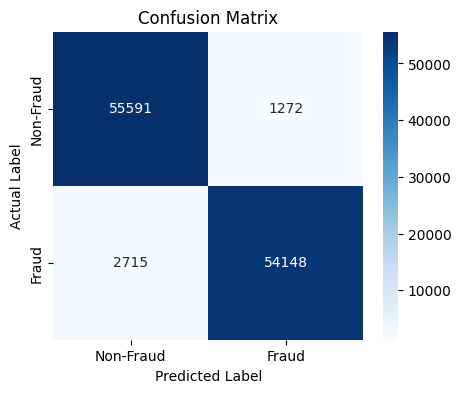

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set category labels
labels = ["Non-Fraud", "Fraud"]

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)

# Add axis labels
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()